In [ ]:
from datasets import load_dataset

dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')

Generating corpus split: 0 examples [00:00, ? examples/s]

Zadanie 1 godziny

In [ ]:
import re
import matplotlib.pyplot as plt

big_text = ' '.join(dataset['corpus']['text'])

hours = re.findall("[^[:](((([0-1][0-9]|[0-9]|2[0-4]):([0-5][0-9]))|(o godzinie ([0-1][0-9]|[0-9]|2[0-4])\.([0-5][0-9]))))", big_text)

Zadanie 1 daty

In [ ]:
months_all = re.findall("((([0-2][0-9]|3[0-1]|[0-9]) (stycznia|lutego|marca|kwietnia|maja|Maj|czerwca|lipca|sierpnia|września|października|Październik|listopada|grudnia))|(([0-2][0-9]|3[0-1]|[0-9])[^.]\.(1[0-2]|0[0-9])\.(20[0-2][0-9]|[0-2][0-9])[^.])|((20[0-2][0-9]|[0-2][0-9])-(1[0-2]|0[0-9])-([0-2][0-9]|3[0-1]|[0-9])))", big_text)

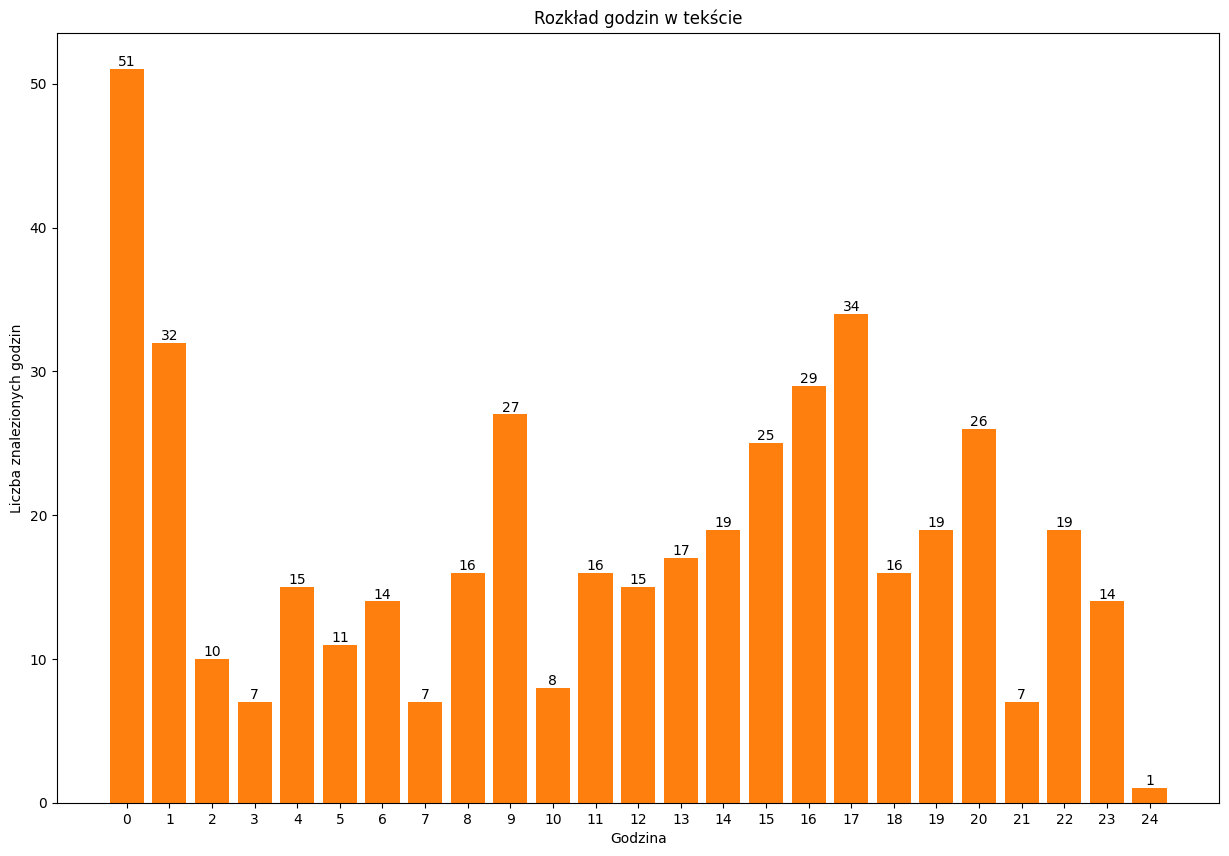

In [ ]:
def proccess_hour(hour):
  if hour[3] != '':
    return int(hour[3])
  else:
    return int(hour[-2])

proccessed_hours = 25*[0]
labels = [f"{i}" for i in range(25)]
for hour in hours:
  proccessed_hours[proccess_hour(hour)] += 1

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, proccessed_hours)

ax.set_xlabel("Godzina")
labels2 = ax.bar(labels, proccessed_hours)
ax.set_ylabel("Liczba znalezionych godzin")
ax.set_title("Rozkład godzin w tekście")
ax.bar_label(labels2)
plt.show()

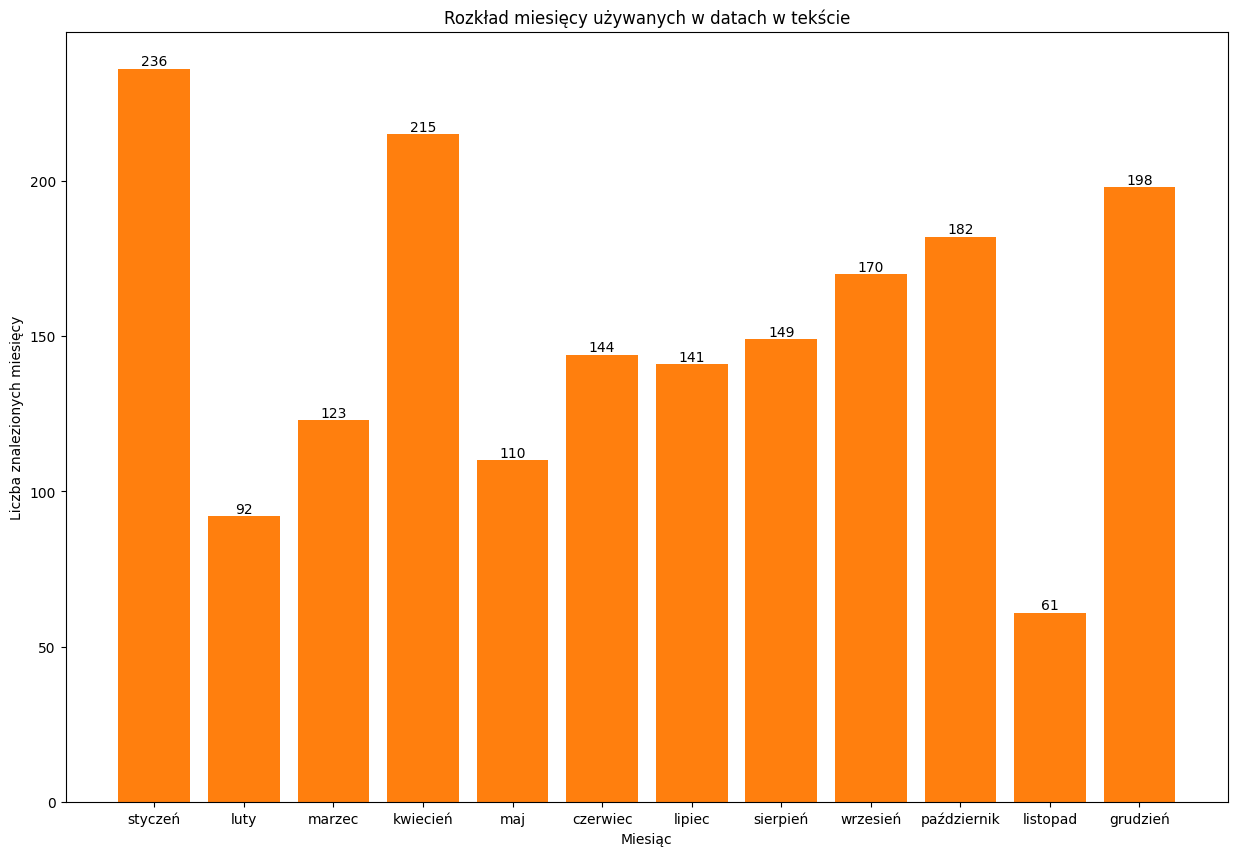

In [ ]:
dictionary = {"stycznia": 1, "lutego": 2, "marca": 3, "kwietnia": 4, "maja": 5, "Maj": 5, "czerwca": 6, "lipca": 7, "sierpnia": 8, "września": 9, "października": 10, "Październik": 10, "listopada": 11, "grudnia": 12}

labels = ["styczeń", "luty", "marzec", "kwiecień", "maj", "czerwiec", "lipiec", "sierpień", "wrzesień", "październik", "listopad", "grudzień"]
proccessed_months = 12*[0]

def proccess_month(date):
  if date[3] != '':
    return dictionary[date[3]]
  if date[-2] != '':
    return int(date[-2])
  return int(date[6])

for date in months_all:
  proccessed_months[proccess_month(date)-1] += 1

fig, ax = plt.subplots(figsize=(15,10))


labels2 = ax.bar(labels, proccessed_months)
ax.bar(labels, proccessed_months)

ax.set_xlabel("Miesiąc")
ax.set_ylabel("Liczba znalezionych miesięcy")
ax.set_title("Rozkład miesięcy używanych w datach w tekście")
ax.bar_label(labels2)
plt.show()

Zadanie 4,5,6

In [ ]:
#zadanie 4
january_all = re.findall("\\b((s|S)tycz((eń)|(ni((ami)|(ach)|a|(owi)|(em)|u|om|e|(ów)|))))\\b", big_text)
print(len(january_all))

#zadanie 5
january_number_before = re.findall("[0-9] (\\b(s|S)tycz((eń)|(ni((ami)|(ach)|a|(owi)|(em)|u|om|e|(ów)|))))\\b", big_text)
print(len(january_number_before))

#zadanie 6
january_not_number_before = re.findall("(?<![0-9] )(\\b(((s|S)tycz((eń)|(ni((ami)|(ach)|a|(owi)|(em)|u|om|e|(ów)|))))\\b))", big_text)
print(len(january_not_number_before))

463
215
248


**215(odmiana "styczeń", przed którą jest liczba i spacja) + 248(Odmiana słowa "styczeń" przed którą nie stoi liczba i spacja) = 463**

Are regular expressions good at capturing times?

Wyrażenia regularne, dość dobrze poradziły sobie z zadaniem znajdywania godzin w tekście. Godzina ma bardzo ustrukturyzowany format i dość łatwo ją znaleźć. Niestety w tekście znajdują się też godziny, których nie udało mi się uzyskać za pomocą stworzonego przeze mnie wyrażenia regularnego, gdyż ich struktura jest zbyt podobna do dat/minuty i sekundy filmu/kwocie pieniędzy.


Are regular expressions good at capturing dates?

Według mnie, wyrażenia regularne nie są dobre w wychwytywaniu dat w tekście. Data w przeciwieństwie do godziny może być zapisana i często jest zapisywana słownie, co bardzo utrudnia jej wyłapywanie. Mnogość dostęnych formatów i ich podobieństwo do innych oznaczeń, powoduje, że zagadnienie znajdowania dat za pomocą wyrażeń regularnych jest bardzo skomplikowane i czasochłonne.

How one can be sure that the expression has matched all and only the correct expressions of a given type?

Według mnie, nie ma sposobu, aby to zweryfikować. Tworząc wyrażenie regularne, trzeba wykazać się kretywnością, aby przewidzieć w jakiej formie mogą występować w tekście interesujące nas dane. Następnie należy dokonywać kolejnych iteracji, podczas których dokonujemy sprawdzenia nowego regex'a, a następnie weryfikujemy, czy znajdywane przez niego dane są poprawne, czy nie. Dobrym sposobem jest również przeglądnięcie tekstu, w poszukiwaniu form które w nim występują.